* [AutoEncoders in Keras](https://mc.ai/autoencoders-in-keras/?utm_source=tuicool&utm_medium=referral)

In [6]:
from keras.datasets import mnist

(data, labels), (_, _) = mnist.load_data()

In [8]:
data = data.reshape(-1, 28*28) / 255.
data.shape

(60000, 784)

In [9]:
from keras import models, layers
input_layer = layers.Input(shape=(28*28,))
encoding_layer = layers.Dense(2)(input_layer)
decoding_layer = layers.Dense(28*28) (encoding_layer)
autoencoder = models.Model(input_layer, decoding_layer)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
autoencoder.compile('adam', loss='binary_crossentropy')
autoencoder.fit(x = data, y = data, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.3336
Epoch 2/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.2824
Epoch 3/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.2734
Epoch 4/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.2644
Epoch 5/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.2519


In [11]:
encoder = models.Model(input_layer, encoding_layer)

In [12]:
encodings = encoder.predict(data)

In [14]:
encodings

array([[-0.28437465,  2.8867235 ],
       [ 1.093176  ,  4.44672   ],
       [ 1.2627299 ,  3.0092506 ],
       ...,
       [-1.1447843 ,  1.9995344 ],
       [ 1.1295161 ,  2.643264  ],
       [ 0.0219575 ,  3.0384831 ]], dtype=float32)

# 特征工程

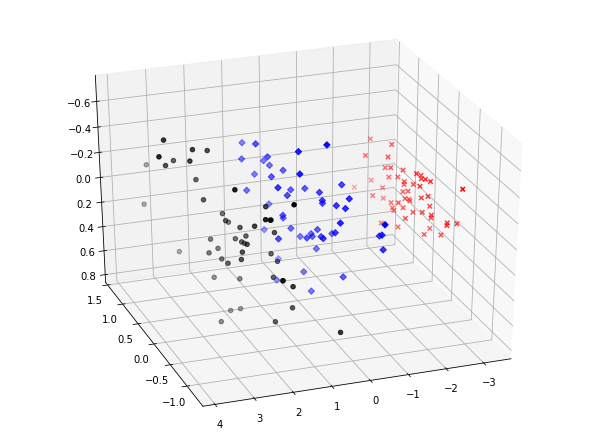

In [16]:
%matplotlib inline
#导入iris特征数据到data变量中
import pandas
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

iris =datasets.load_iris()

data = iris.data

#分类变量到target变量中
target = iris.target

#使用主成分分析，将四维数据压缩为三维
pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(data)

#绘图
colors={0:'r',1:'b',2:'k'}
markers={0:'x',1:'D',2:'o'}

#弹出图形
#%matplotlib qt

#三维数据
fig = plt.figure(1,figsize=(8,6))
ax = Axes3D(fig,elev=-150,azim=110)

data_pca_gb = pandas.DataFrame(
    data_pca_3
).groupby(target)

for g in data_pca_gb.groups:
    ax.scatter(
        data_pca_gb.get_group(g)[0],
        data_pca_gb.get_group(g)[1],
        data_pca_gb.get_group(g)[2],
        c=colors[g],
        marker=markers[g],
        cmap=plt.cm.Paired
    )
plt.show()